In [100]:
import keras
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint, History
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [101]:
n_samples = 250
datasets = {'moons': make_moons(noise=0.3, random_state=0, n_samples=n_samples),
            'circles': make_circles(noise=0.2, factor=0.5, random_state=1, n_samples=n_samples)}

In [102]:
def plot_loss(train_loss, val_loss):
    plt.plot(train_loss, label='train_loss')
    plt.plot(val_loss, label='val_loss')
    plt.grid()
    plt.legend()
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.show()

In [103]:
def plot_dataset(X_train, y_train, X_test, y_test):
    x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
    y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(1, 1, 1)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    plt.show()

In [104]:
def plot_prediction(X_train, y_train, X_test, y_test, clas_model, score):
    x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
    y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    Z = clas_model.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax = plt.subplot(1, 1, 1)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    # Plot also the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='black', s=25)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
               alpha=0.6, edgecolors='black', s=25)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title('basemodel')
    ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
            size=15, horizontalalignment='right')
    plt.show()

In [105]:
def get_label(y_scores, threshold=0.5):
    y_labels = []
    for pred in y_scores:
        if pred > threshold:
            y_labels.append(1)
        else:
            y_labels.append(0)
    return y_labels

In [106]:
def baseline_model():
    # Create model
    model = Sequential()
    model.add(Dense(1, input_dim=2, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adamax')
    return model

In [107]:
def deep_model_v1():
    # Create model
    model = Sequential()
    model.add(Dense(100, input_dim=2, kernel_initializer='normal', activation='linear'))
    model.add(Dense(100, input_dim=100, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, input_dim=100, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adamax')
    return model

In [108]:
h = .02  # step size in the mesh

In [109]:
# X, y = datasets['moons']
X, y = datasets['circles']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

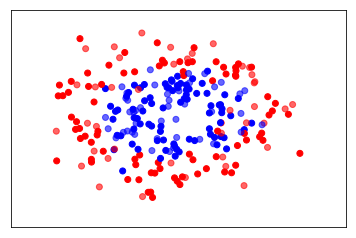

In [110]:
plot_dataset(X_train, y_train, X_test, y_test)

Добавляем 2 callback'a

In [111]:
callbacks = [EarlyStopping(monitor='val_loss', patience=5),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

In [112]:
# cls_model = baseline_model()
cls_model = deep_model_v1()
history = cls_model.fit(X_train, y_train, validation_data=(X_test,y_test), batch_size=128, 
               epochs=1000, callbacks=callbacks, verbose=0)

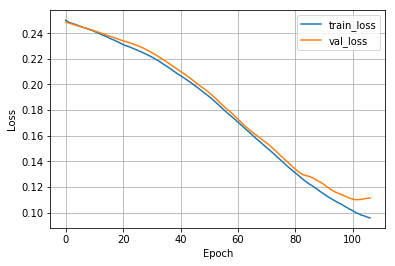

In [113]:
plot_loss(history.history['loss'], history.history['val_loss'])

In [114]:
score = accuracy_score(y_pred=get_label(cls_model.predict(X_test)), y_true=y_test)

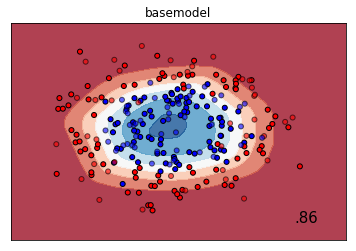

In [115]:
plot_prediction(X_train, y_train, X_test, y_test, cls_model, score)